<a href="https://colab.research.google.com/github/ssrinivas-berkeley/genai-playground/blob/main/Daily_Movie_Poster_Colab_fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🎟️ Daily Movie Poster (Colab, compat-fixed)

Upload 2–3 photos and a title/tagline; get a glossy poster with color grading, vignette, and typography.


## 🛠️ Setup

In [1]:

!pip -q install --upgrade Pillow==10.4.0 numpy==2.0.2
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageOps, ImageDraw as _ID
import numpy as np, io, os
from google.colab import files
from IPython.display import display
os.makedirs("results", exist_ok=True)

# Pillow textsize shim
def _compat_textsize(self, text, font=None, *args, **kwargs):
    bbox = self.textbbox((0,0), text, font=font, *args, **kwargs)
    return (bbox[2]-bbox[0], bbox[3]-bbox[1])
if not hasattr(_ID.ImageDraw, "textsize"):
    _ID.ImageDraw.textsize = _compat_textsize  # type: ignore[attr-defined]

print("✅ Installed and shim ready")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 42.8 MB/s eta 0:00:00
✅ Installed and shim ready


## 📁 Upload 1–3 photos

In [7]:

uploaded = files.upload()
imgs = []
for k, v in uploaded.items():
    imgs.append(Image.open(io.BytesIO(v)).convert("RGB"))
print(f"Loaded {len(imgs)} images")
assert len(imgs) >= 1, "Upload at least one image"


Saving ice.jpeg to ice (2).jpeg
Saving jugg.jpeg to jugg (2).jpeg
Saving muerta.jpeg to muerta (2).jpeg
Saving pa.jpeg to pa (2).jpeg
Saving sven.jpeg to sven (2).jpeg
Loaded 5 images


## 🖼️ Compose Poster

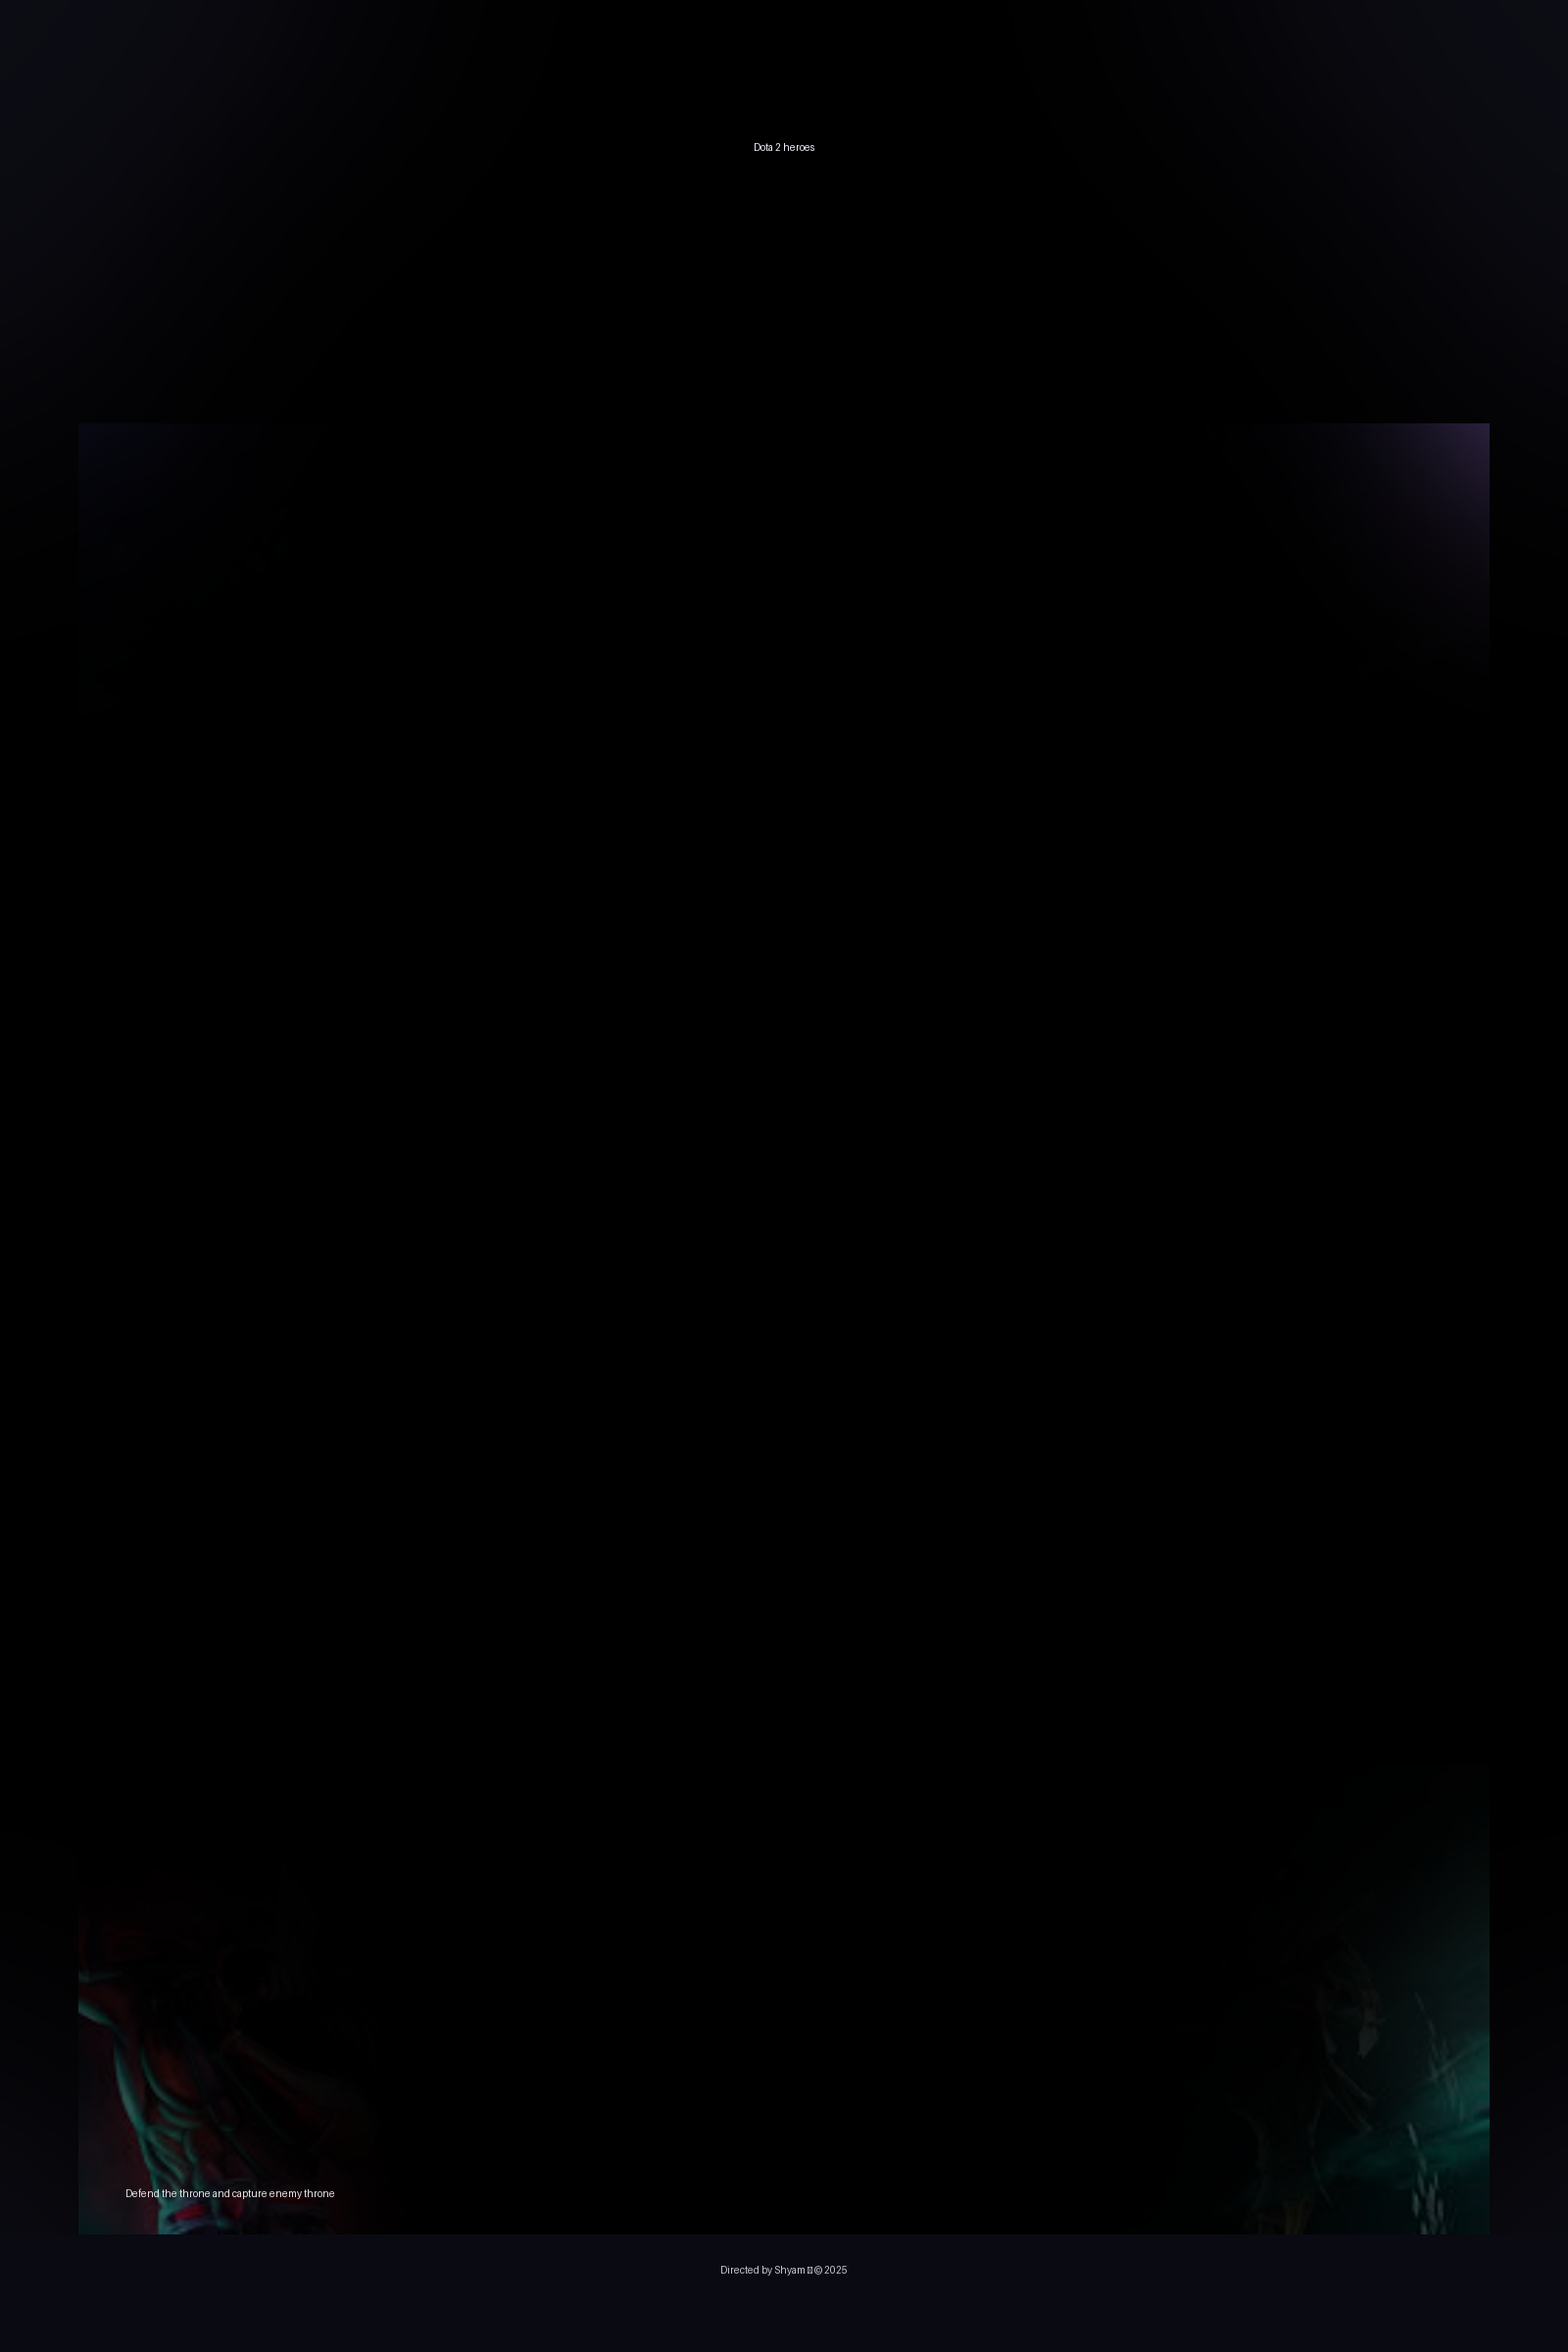

✅ Saved results/daily_movie_poster.png


In [10]:

TITLE = "Dota 2 heroes"
TAGLINE = "Defend the throne and capture enemy throne"

W, H = 1600, 2400
canvas = Image.new('RGB', (W, H), (12,12,20))

def place(img, box):
    x,y,w,h = box
    from PIL import ImageOps
    im = ImageOps.fit(img, (w,h))
    canvas.paste(im, (x,y))

place(imgs[0], (int(W*0.05), int(H*0.18), int(W*0.9), int(H*0.55)))
if len(imgs) > 1:
    place(imgs[1], (int(W*0.05), int(H*0.75), int(W*0.42), int(H*0.2)))
if len(imgs) > 2:
    place(imgs[2], (int(W*0.53), int(H*0.75), int(W*0.42), int(H*0.2)))

vig = Image.new('L', (W,H), 0)
draw = ImageDraw.Draw(vig)
draw.ellipse((-int(W*0.1), -int(H*0.05), int(W*1.1), int(H*1.1)), fill=255)
vig = vig.filter(ImageFilter.GaussianBlur(radius=120))
canvas = Image.composite(canvas, Image.new('RGB', (W,H), (0,0,0)), ImageOps.invert(vig))

draw = ImageDraw.Draw(canvas)
try:
    title_font = ImageFont.truetype("DejaVuSans-Bold.ttf", 160)
    tag_font = ImageFont.truetype("DejaVuSans.ttf", 64)
except:
    title_font = ImageFont.load_default(); tag_font = ImageFont.load_default()

tw, th = draw.textsize(TITLE, font=title_font)
draw.text(((W-tw)//2, int(H*0.06)), TITLE, font=title_font, fill=(240,240,255))

draw.text((int(W*0.08), int(H*0.93)), TAGLINE, font=tag_font, fill=(230,230,230))

draw.rectangle((0, H-120, W, H), fill=(10,10,18))
credits = "Directed by Shyam • © 2025"
cw, ch = draw.textsize(credits, font=tag_font)
draw.text(((W-cw)//2, H-90), credits, font=tag_font, fill=(200,200,210))

out = "results/daily_movie_poster.png"
canvas.save(out)
display(Image.open(out))
print("✅ Saved", out)
